# DataArray - Dfs123 plotting

A DataArray with gridded data, can be plotted in many different ways.

In [1]:
import mikeio

## Dfs1

In [2]:
ds = mikeio.read("../tests/testdata/vu_tide_hourly.dfs1")
ds = ds.rename({"Tidal current component (geographic East)":"Tidal current u-comp"})
da = ds["Tidal current u-comp"]
da

<mikeio.DataArray>
name: Tidal current u-comp
dims: (time:721, x:11)
time: 2021-08-01 00:00:00 - 2021-08-31 00:00:00 (721 records)
geometry: Grid1D (n=11, dx=0.09818)

In [3]:
da.geometry

<mikeio.Grid1D>
axis: nx=11 points from x0=0 to x1=0.981768 with dx=0.0981768

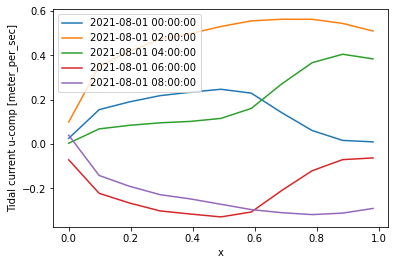

In [4]:
steps = slice(0,10,2)
ax=da[steps].plot()
ax.legend(da[steps].time);

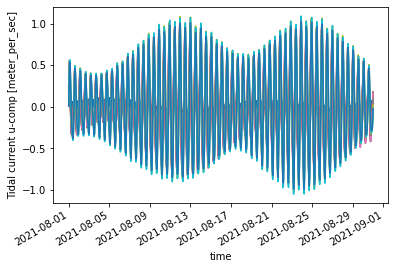

In [5]:
# plot all points on line as time series
da.plot.timeseries();

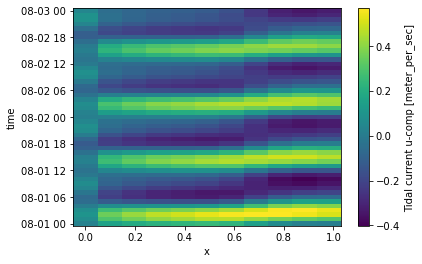

In [6]:
# first 48 hours...  
da[:49].plot.pcolormesh();

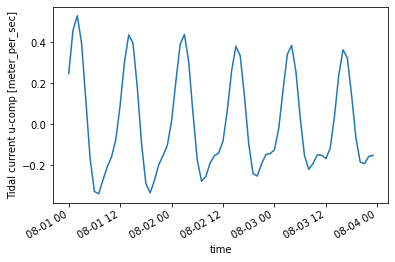

In [7]:
da.sel(x=0.5).sel(time=slice("2021-08-01","2021-08-03")).plot();

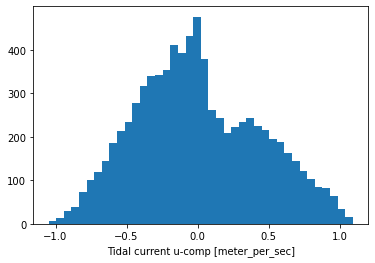

In [8]:
da.plot.hist(bins=40);

## Dfs2

In [9]:
da = mikeio.read("../tests/testdata/gebco_sound.dfs2")[0]
da

<mikeio.DataArray>
name: Elevation
dims: (time:1, y:264, x:216)
time: 2020-05-15 11:04:52 (time-invariant)
geometry: Grid2D (ny=264, nx=216)

In [10]:
da.geometry

<mikeio.Grid2D>
x-axis: nx=216 points from x0=12.2021 to x1=13.0979 with dx=0.00416667
y-axis: ny=264 points from y0=55.2021 to y1=56.2979 with dy=0.00416667
Number of grid points: 57024

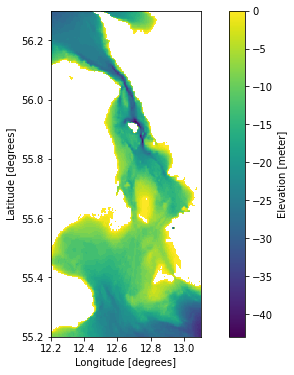

In [11]:
da.plot(figsize=(10,6));

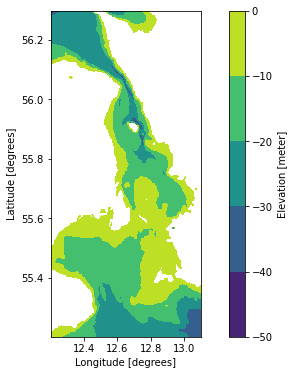

In [12]:
da.plot.contourf(figsize=(10,6), levels=4);

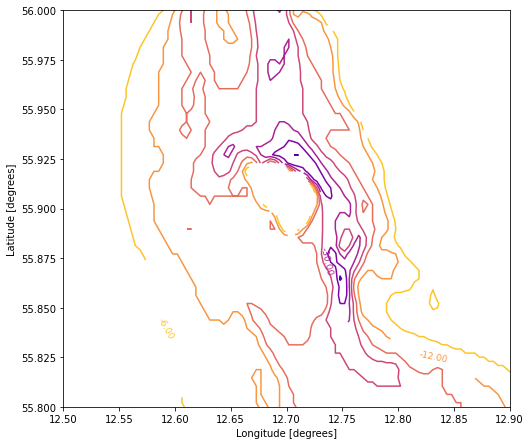

In [13]:
ax = da.plot.contour(figsize=(8,8), cmap="plasma")
ax.set_xlim([12.5, 12.9]);
ax.set_ylim([55.8, 56]);

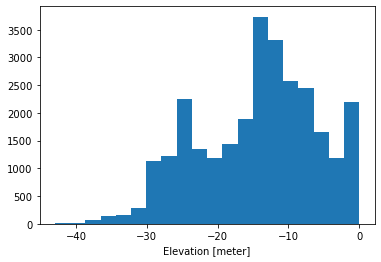

In [14]:
da.plot.hist(bins=20);

## Dfs3

In [15]:
fn = "../tests/testdata/test_dfs3.dfs3"
dfs = mikeio.open(fn)
dfs

<mikeio.Dfs3>
geometry: Grid3D(nz=34, ny=17, nx=21)
items:
  0:  Temperature <Temperature> (degree Kelvin)
time: 2 steps
start time: 2020-12-30 00:00:00

In [16]:
dfs.geometry

<mikeio.Grid3D>
x-axis: nx=21 points from x0=0 to x1=5 with dx=0.25
y-axis: ny=17 points from y0=0 to y1=4 with dy=0.25
z-axis: nz=34 points from z0=0 to z1=33 with dz=1

In [17]:
ds=dfs.read()
ds

<mikeio.Dataset>
dims: (time:2, z:34, y:17, x:21)
time: 2020-12-30 00:00:00 - 2020-12-30 01:00:00 (2 records)
geometry: Grid3D(nz=34, ny=17, nx=21)
items:
  0:  Temperature <Temperature> (degree Kelvin)

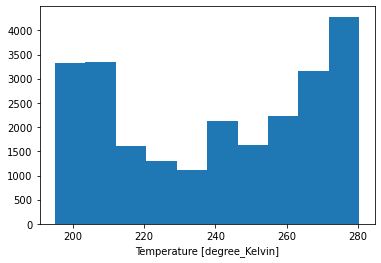

In [18]:
ds.Temperature.plot();

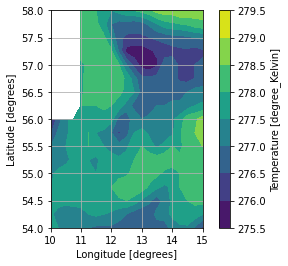

In [19]:
ax = ds.Temperature[:,0,:,:].plot.contourf();
ax.grid()

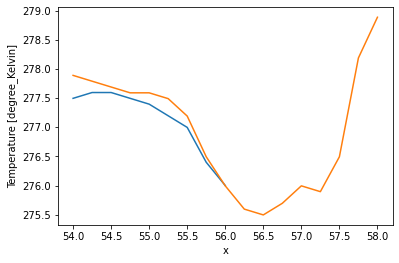

In [20]:
ds.Temperature[:,0,:,0].plot();

In [21]:
ds=dfs.read(layers=0)
ds

c:\users\jem\source\mikeio\mikeio\dfs3.py:261: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if layers == "bottom":


<mikeio.Dataset>
dims: (time:2, y:17, x:21)
time: 2020-12-30 00:00:00 - 2020-12-30 01:00:00 (2 records)
geometry: Grid2D (ny=17, nx=21)
items:
  0:  Temperature <Temperature> (degree Kelvin)

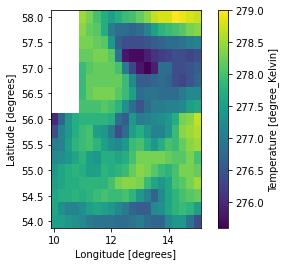

In [22]:
ds.Temperature.plot();